# Predicting Anxiety and Depression Based on Social Media Use Patterns

The relationship between social media use and mental health outcomes is not fully understood.
Given that social media is widespread among many different demographics, it is critical to understand this relationship and the effects social media has on mental health in order to properly treat mental disorders and improve quality of life for those suffering from them.

As "mental health" is a far reaching and abstractly defined concept, this project will focus on two of the most common mental health disorders, anxiety and depression, and will use various machine learning classifiers to isolate the relationship between these disorders and social media use in individuals and create models capable of predicting depression and anxiety.

### The impact of mental illness

Mental illness impacts individuals, and by extension society, in a variety of ways.

According to the World Health Organization (WHO):
- Mental health conditions can cause difficulties in all aspects of life, including relationships with family, friends and community.
- In 2019, 970 million people globally were living with a mental disorder, with anxiety and depression the most common. This means approximately **1 in 8** people suffer from some form of mental illness.
- In 2019, 301 million people were living with an anxiety disorder including 58 million children and adolescents.
- In 2019, 280 million people were living with depression, including 23 million children and adolescents.

The high prevalence of both social media use and mental health disorders combined with the currently limited understanding of the way they interact makes further analysis of the subject crucial to public health.

# Project goals

Despite the prevalence of these disorders, detection and diagnosis still pose a significant challenge due to several factors:
- Diagnosis of anxiety and depression is made according to the self reported feelings of the patient.

  This means that factors such as the individuals personal feelings on mental health, their willingness to accept help, and social stigma all play a part in the detection of these disorders in a way which is not present with physical conditions.
-  Disease comorbidity

   The existence of two or more mental health disorders in an individual is common, and those with one type of mental disorder often develop other types of mental disorders.
   Moreover, many disorders share similar symptoms, making it difficult to identify the primary condition.

The primary goal of this project is to create a predictive model for detection of anxiety and depression based on individual social media use patterns.
Through this, I hope to create another tool for individuals and health care professionals to use in the difficult task of mental health diagnosis.

The secondary goal of this project is to map the relationship between mental health and social media, and to identify healthy and unhealthy social media use patterns using machine learning tools. 

# Exploratory Data Analysis
### The Dataset

The dataset used in this project is comprised of 482 responses to a survey conducted on Bangladeshi citizens.
The first 8 questions are designed to understand the demographics and social media use patterns of the participants. 
The last 12 questions are designed to get various mental health indicators regarding the participants, and responses are based on the Likert scale (meaning a low score of 1 indicates that the participant "strongly disagrees" with the question, and a high score of 5 means the participant "strongly agrees").

The set: https://docs.google.com/spreadsheets/d/1lWFIL7h0F7xtmJHNPJX7ttPkO4v9j3xQ2E9Qb1wjek4/edit?usp=sharing

### Importing and loading the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [8]:
data = pd.read_csv('formresponses.csv')

### Data Preprocessing

We have ample information regarding our parameters, and so we will begin by performing manual dimensionality reduction to remove irrelevant data.<br>
Let us examine our variables:

In [11]:
list(data.columns)

['Timestamp',
 '1. What is your age?',
 '2. Gender',
 '3. Relationship Status',
 '4. Occupation Status',
 '5. What type of organizations are you affiliated with?',
 '6. Do you use social media?',
 '7. What social media platforms do you commonly use?',
 '8. What is the average time you spend on social media every day?',
 '9. How often do you find yourself using Social media without a specific purpose?',
 '10. How often do you get distracted by Social media when you are busy doing something?',
 "11. Do you feel restless if you haven't used Social media in a while?",
 '12. On a scale of 1 to 5, how easily distracted are you?',
 '13. On a scale of 1 to 5, how much are you bothered by worries?',
 '14. Do you find it difficult to concentrate on things?',
 '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
 '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
 '17. How often do

Since the main focus of this project is an analysis related to depression and anxiety, we will remove all mental health indicators that are unrelated to these two conditions. The symptoms we require indicators for, and the questions that are relevant to them, are as follows:

<u>Depression:</u>
- a depressed mood (question 18)
- a loss of pleasure or interest in activities (question 19)
- poor concentration (questions 10, 12, 14)
- feelings of excessive guilt or low self-worth (question 15)
- hopelessness about the future (no relevant questions)
- thoughts about dying or suicide (no relevant questions)
- disrupted sleep (question 20)
- changes in appetite or weight (no relevant questions)
- feeling very tired or low in energy. (question 18)

<u>Anxiety:</u>
- excessive fear or worry about a specific situation or a broad range of everyday situations (question 13)
- poor concentration (questions 10, 12, 14)
- feeling irritable, tense or restless (question 11)
- experiencing nausea or abdominal distress (no relevant questions)
- having heart palpitations (no relevant questions)
- sweating, trembling or shaking (no relevant questions)
- disrupted sleep (question 20)
- having a sense of impending danger, panic or doom (question 13)

(symptoms for both disorders are according to the WHO: https://www.who.int/news-room/fact-sheets/detail/depression, https://www.who.int/news-room/fact-sheets/detail/anxiety-disorders)

We can see that all the questions that are mental health indicators are relevant to our analysis except questions 9, 16 and 17.<br>
In addition, the first column indicates a timestamp for when the participant took the survery, which we dont need.<br>
So, we will remove these columns from our dataframe.

In [13]:
data = data.drop(columns=['Timestamp', '9. How often do you find yourself using Social media without a specific purpose?', 
                          '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
                          '17. How often do you look to seek validation from features of social media?'], axis=1)

we will also rename the columns for the sake of simplicity:

In [15]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Distracted by SM',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Restlessness',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Easily Distracted',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxious',
                       '14. Do you find it difficult to concentrate on things?':'Difficulty Concentrating',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'SM Comparison',
                       '18. How often do you feel depressed or down?':'Depressed',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Loss of Interest in Activities',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleep Issues' },inplace=True)

### Depression and Anxiety scores
In order to train machine learning models on our data, we must first quantify the likelihood of depression and anxiety in our participants.<br> Since the answers for each indicator are on a scale of 1 to 5, we will do this by simply summing up the answers related to each condition, and adding them as columns "Anxiety score" and "Depression score". <br>We will also double the weight of questions 13 and 18, since they are the primary symptoms of each condition and are therefor the most direct indicators of anxiety/depression. 

In [17]:
# create arrays for each condition with the appropriate indicators according to the WHO as specified above

depression = ['Depressed', 'Loss of Interest in Activities', 'Distracted by SM','Easily Distracted', 'Difficulty Concentrating', 'SM Comparison', 'Sleep Issues']
anxiety = ['Anxious', 'Restlessness', 'Distracted by SM','Easily Distracted', 'Difficulty Concentrating', 'Sleep Issues']

# sum up scores for depression and anxiety
data['Depression Score'] = data[depression].sum(axis=1)
data['Anxiety Score'] = data[anxiety].sum(axis=1)

# double the weight of questions 13 and 18 by adding them to the score columns again.
data['Depression Score'] += data['Depressed']
data['Anxiety Score'] += data['Anxious']

There are 7 depression indicators and 6 anxiety indicators, so the score range for depression is [8, 40] and the score range for anxiety is [7, 35].<br>
We will split each of these ranges into 4 subranges indicating the likelihood of depression/anxiety in each participant, and add them as columns:<br>

In [19]:
# define a function which takes a row as a range, and returns the likelihood of depression based on the depression score.
def depRange(row):
    if row['Depression Score'] < 16:
        return 'low'
    if row['Depression Score'] < 24:
        return'moderate'
    if row['Depression Score'] < 32:
        return 'high'
    return'very high'

# define a function which takes a row as a range, and returns the likelihood of anxiety based on the anxiety score.
def anxRange(row):
    if row['Anxiety Score'] < 16:
        return 'low'
    if row['Anxiety Score'] < 24:
        return'moderate'
    if row['Anxiety Score'] < 32:
        return 'high'
    return'very high'

# apply the functions to our dataframe, and create new columns indicating depression and anxiety likelihood.
data['Depression Likelihood'] = data.apply(depRange, axis=1)
data['Anxiety Likelihood'] = data.apply(anxRange, axis=1)

# lets see what our data looks like
data.head(5)

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Distracted by SM,Restlessness,...,Anxious,Difficulty Concentrating,SM Comparison,Depressed,Loss of Interest in Activities,Sleep Issues,Depression Score,Anxiety Score,Depression Likelihood,Anxiety Likelihood
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,...,2,5,2,5,4,5,34,24,very high,high
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,...,5,4,5,5,4,5,35,28,very high,high
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,...,5,4,3,4,2,5,26,24,high,high
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,2,1,...,5,3,5,4,3,2,26,21,high,moderate
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,5,4,...,5,5,3,4,4,1,30,29,high,high


Now that the levels of our participants depression and anxiety are quantified, we can start visualizing the data.

### Data Visualization
Lets begin by looking at the general distribution of the likelihood of depression and anxiety in our dataset:

<Axes: xlabel='Depression Likelihood', ylabel='Count'>

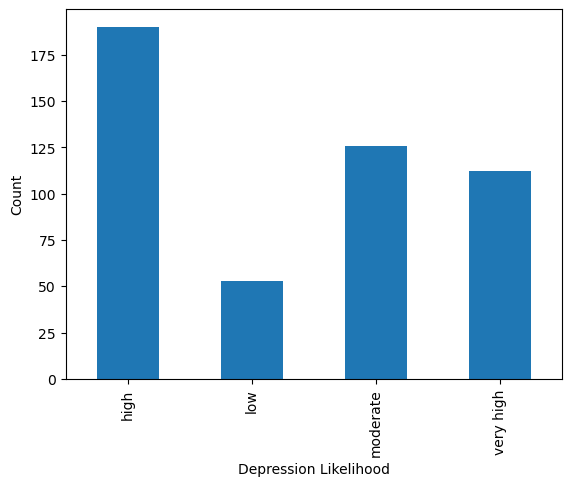

In [21]:
data.groupby('Depression Likelihood').size().plot.bar(xlabel='Depression Likelihood', ylabel='Count')

<Axes: xlabel='Anxiety Likelihood', ylabel='Count'>

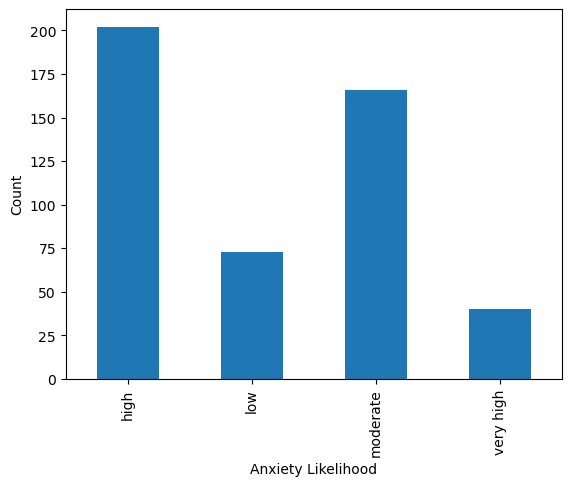

In [22]:
data.groupby('Anxiety Likelihood').size().plot.bar(xlabel='Anxiety Likelihood', ylabel='Count')

From these two plots we can see that anxiety and depression are present in our sample to a relatively high degree, with the majority of participants presenting with a high or moderate likelihood of depression and anxiety.<br>
We can also see that there is a slightly higher prevelance of anxiety disorders among the participants which is consistent with real world data, although a much higher percentage of the sample suffers from a very high likelihood of depression, in comparison with much lower levels (approx. a third) of very high anxiety.<br><br>
Now let's examine the distributions of depression and anxiety across our parameters. We will start with the hours spent on social media:

Time Spent
More than 5 hours        116
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 1 and 2 hours     70
Between 4 and 5 hours     67
Less than an Hour         34
Name: count, dtype: int64


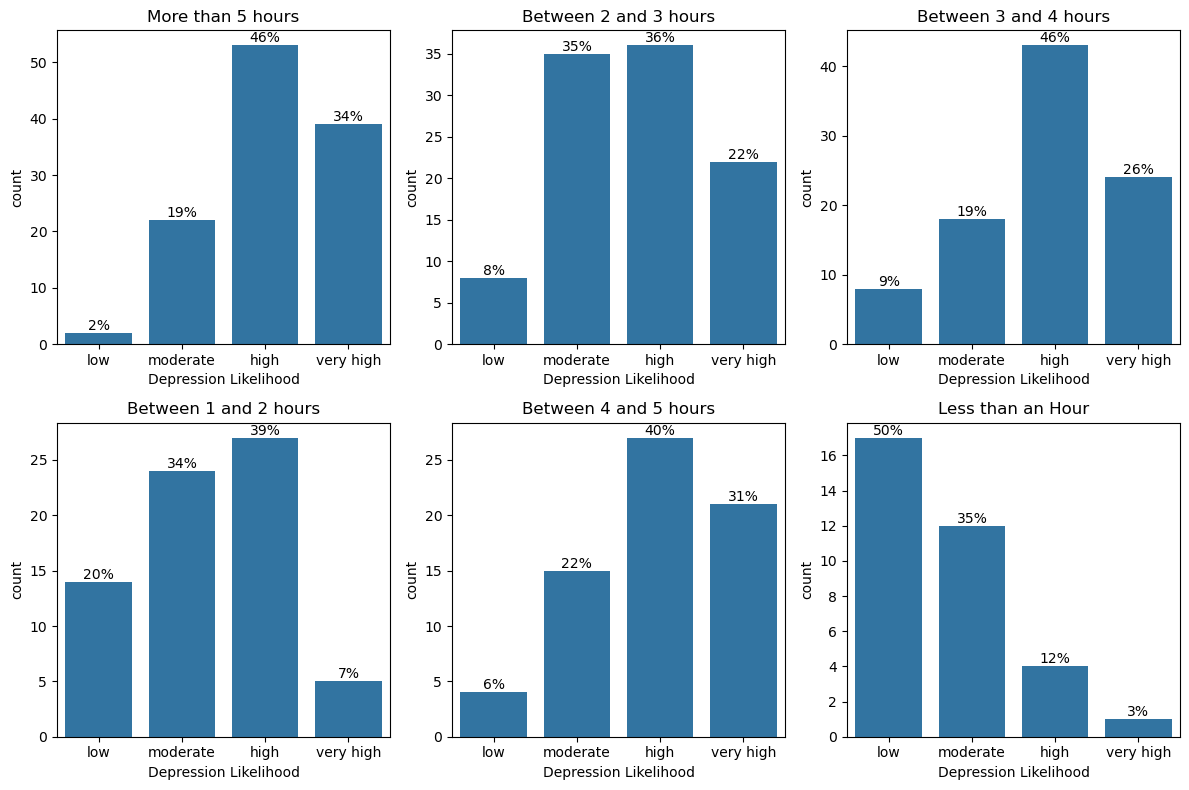

In [164]:
# TODO reorder 'time spent' category from lowest to highest

# reorder 'time spent' category for convinience
#data['Time Spent'] = pd.Categorical(df['Time Spent'], 
#                                    categories=['Less than an hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours', 
#                                                'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours'], ordered=True)

# get the value counts for each 'time spent' parameter
vCounts = data['Time Spent'].value_counts()
print(vCounts)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
row = 0
col = 0

# create plots
for i, time in enumerate(vCounts.keys()):
    vCount = vCounts.iloc[i]
    
    df = data.loc[data['Time Spent'] == time]
    sns.countplot(data=df, x='Depression Likelihood', ax=axs[row,col], order= ['low', 'moderate', 'high', 'very high'])

    ax = axs[row, col]
    ax.set_title(time)

    # calculate percentage levels for each bar and add it as text.
    for p in ax.patches: 
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2, 
                height ,
                '{0:.0%}'.format(height/vCount),
                va="bottom", ha="center")
    col += 1
    if col >= 3:
        col = 0
        row += 1

plt.tight_layout()

In general, the data seems to suggest that the higher the amount of time spent on social media, the higher the likelihood and severity of depression indicators.<br>
Those who spend less than an hour on social media have by far the lowest percentage of 'very high' depression likelihood and the highest percentage of 'low' depression likelihood, and the reverse is true for those who spend more than 5 hours on social media. <br>
Lets examine the likelihood of anxiety:

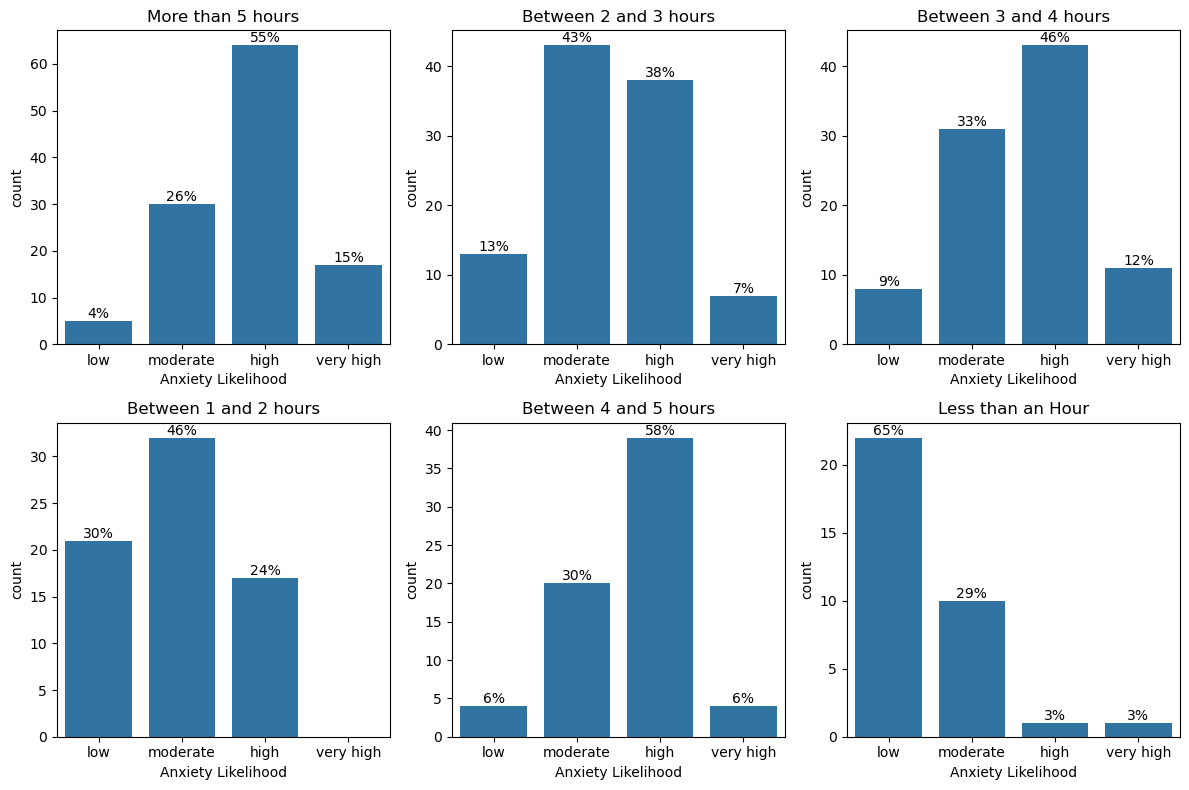

In [166]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
row = 0
col = 0

# create plots
for i, time in enumerate(vCounts.keys()):
    vCount = vCounts.iloc[i]
    
    df = data.loc[data['Time Spent'] == time]
    sns.countplot(data=df, x='Anxiety Likelihood', ax=axs[row,col], order= ['low', 'moderate', 'high', 'very high'])

    ax = axs[row, col]
    ax.set_title(time)

    # calculate percentage levels for each bar and add it as text.
    for p in ax.patches: 
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2, 
                height ,
                '{0:.0%}'.format(height/vCount),
                va="bottom", ha="center")
    col += 1
    if col >= 3:
        col = 0
        row += 1

plt.tight_layout()

Anxiety likelihood trends appear to match those for depression likelihood, in that the lower the time spent on social media, the lower the presence and severity of anxiety indicators and overwhelmingly the lowest prevalence of anxiety indicators is among those who spend less than an hour on social media and the highest prevalence is among those who spend more than 5 hours on it. <br>
Interestingly, every category has some level of 'very high' anxiety likelihood except for 'Between 1 and 2 hours', but this isnt statistically significant as the percentages are very small in the lower 'time spent' categories.<br><br>

Now we will examine the distribution of depression and anxiety likelihood across different social media platforms: